In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [232]:
dataset = pd.read_csv('preprocessing_data.csv')
dataset.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_lower,Tweet_filtering,HS_class,Tweet_token,Tweet_stopword,Tweet_normalized,Tweet_stemmed,Tweet_stemmed_join
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,negative,"['disaat', 'semua', 'cowok', 'berusaha', 'mela...","['disaat', 'cowok', 'berusaha', 'melacak', 'pe...","['di saat', 'cowok', 'berusaha', 'melacak', 'p...","['di saat', 'cowok', 'usaha', 'lacak', 'perhat...",di saat cowok usaha lacak perhati gue kamu lan...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt user: user siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau eluedan sarap gue ...,positive,"['siapa', 'yang', 'telat', 'ngasih', 'tau', 'e...","['telat', 'ngasih', 'tau', 'eluedan', 'sarap',...","['telat', 'memberi', 'tau', 'eluedan', 'sarap'...","['telat', 'beri', 'tau', 'eluedan', 'sarap', '...",telat beri tau eluedan sarap gue gaul cigax ji...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,"41. kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...,positive,"['kadang', 'aku', 'berfikir', 'kenapa', 'aku',...","['kadang', 'berfikir', 'percaya', 'tuhan', 'ja...","['kadang', 'berpikir', 'percaya', 'tuhan', 'ja...","['kadang', 'pikir', 'percaya', 'tuhan', 'jatuh...",kadang pikir percaya tuhan jatuh berkalikali k...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu aku\n\nku tau matamu sipit t...,aku itu aku ku tau matamu sipit tapi diliat da...,positive,"['aku', 'itu', 'aku', 'ku', 'tau', 'matamu', '...","['ku', 'tau', 'matamu', 'sipit', 'diliat']","['ku', 'tau', 'matamu', 'sipit', 'dilihat']","['ku', 'tau', 'mata', 'sipit', 'lihat']",ku tau mata sipit lihat
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,negative,"['kaum', 'cebong', 'kapir', 'udah', 'keliatan'...","['kaum', 'cebong', 'kapir', 'udah', 'keliatan'...","['kaum', 'cebong', 'kafir', 'sudah', 'kelihata...","['kaum', 'cebong', 'kafir', 'sudah', 'lihat', ...",kaum cebong kafir sudah lihat dongok dungu haha


In [233]:
dt_transformed = dataset[['HS', 'Tweet_stemmed_join']]
y = dt_transformed.iloc[:, 0].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y.reshape(-1, 1)))

print(y)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [234]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

In [235]:
print(y_hate)
print(y_offensive)

[0. 1. 1. ... 1. 1. 0.]
[1. 0. 0. ... 0. 0. 1.]


In [236]:
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(dataset['Tweet_stemmed']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size=0.2, random_state=0)

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [239]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size=0.2, random_state=0)

print ("Number of transacctions X_train dataset: ", X_train.shape)
print ("Number of transacctions y_train dataset: ", y_train.shape)
print ("Number of transacctions X_test dataset: ", X_test.shape)
print ("Number of transacctions y_test dataset: ", y_test.shape)

Number of transacctions X_train dataset:  (10435, 4000)
Number of transacctions y_train dataset:  (10435,)
Number of transacctions X_test dataset:  (2609, 4000)
Number of transacctions y_test dataset:  (2609,)


In [240]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 6024
Before OverSampling, counts of label '0': 4411 



c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


After OverSampling, the shape of train_X: (12048, 4000)
After OverSampling, the shape of train_y: (12048,) 

After OverSampling, counts of label '1': 6024
After OverSampling, counts of label '0': 6024


In [241]:
classifier = MultinomialNB()
classifier.fit(X_train_res, y_train_res)

MultinomialNB()

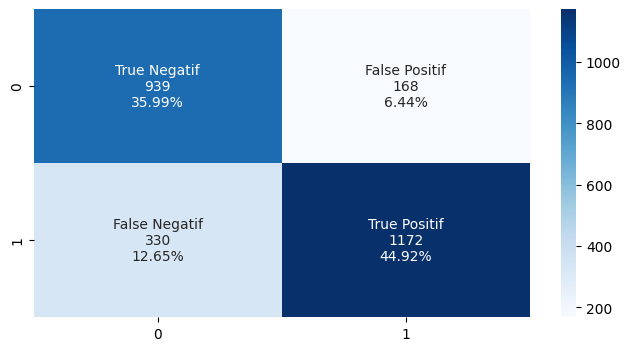

In [242]:
import seaborn as sns

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Negatif','False Positif','False Negatif','True Positif']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [243]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      1107
         1.0       0.87      0.78      0.82      1502

    accuracy                           0.81      2609
   macro avg       0.81      0.81      0.81      2609
weighted avg       0.82      0.81      0.81      2609



In [244]:
import random 

data_try = pd.read_csv('preprocessing_data.csv', encoding='latin-1')

def classify_text(text):
    # Preprocess the input text
    processed_text = re.sub('[^a-zA-Z]', ' ', text)
    processed_text = processed_text.lower()
    processed_text = processed_text.split()
    ps = PorterStemmer()
    stop_words = set(stopwords.words('indonesian'))
    stop_words.remove('tidak')
    processed_text = [ps.stem(word) for word in processed_text if not word in set(stop_words)]
    processed_text = ' '.join(processed_text)
    
    # Vectorize the preprocessed text
    text_vector = cv.transform([processed_text]).toarray()
    
    # Scale the vectorized text
    scaled_text = sc.transform(text_vector)
    
    # Classify the text
    classification = classifier.predict(scaled_text)
    
    return classification

# Test the classifier with input text and classification
input_text = random.choice(data_try['Tweet_stemmed_join'])
classification = classify_text(input_text)
print(f"Input Text: {input_text}")
print(f"Classification: {classification}")



Input Text: kamu bom gimanajauh sudah gue nih takut
Classification: [0.]
